**Importing Libraries**

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


**Importing data**

In [87]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

**EDA**

In [88]:
train_data.shape

(70128, 6)

In [89]:
test_data.shape

(17520, 5)

In [90]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    70128 non-null  int64 
 1   date      70128 non-null  object
 2   country   70128 non-null  object
 3   store     70128 non-null  object
 4   product   70128 non-null  object
 5   num_sold  70128 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 3.2+ MB


In [91]:
train_data.describe()

,row_id,num_sold
count,70128.000000,70128.000000
mean,35063.500000,194.296986
std,20244.354176,126.893874
min,0.000000,19.000000
25%,17531.750000,95.000000
50%,35063.500000,148.000000
75%,52595.250000,283.000000
max,70127.000000,986.000000


In [92]:
train_data.head(15)

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240
5,5,2017-01-01,Belgium,KaggleRama,Kaggle Getting Started,187
6,6,2017-01-01,Belgium,KaggleRama,Kaggle Recipe Book,158
7,7,2017-01-01,Belgium,KaggleRama,Kaggle for Kids: One Smart Goose,267
8,8,2017-01-01,France,KaggleMart,Kaggle Advanced Techniques,610
9,9,2017-01-01,France,KaggleMart,Kaggle Getting Started,463


In [93]:
test_data.head(15)

,row_id,date,country,store,product
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques
5,70133,2021-01-01,Belgium,KaggleRama,Kaggle Getting Started
6,70134,2021-01-01,Belgium,KaggleRama,Kaggle Recipe Book
7,70135,2021-01-01,Belgium,KaggleRama,Kaggle for Kids: One Smart Goose
8,70136,2021-01-01,France,KaggleMart,Kaggle Advanced Techniques
9,70137,2021-01-01,France,KaggleMart,Kaggle Getting Started


In [94]:
#checking for null values in train data
train_data.isnull().sum()


row_id      0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [95]:
#checking for null values in test data
test_data.isnull().sum()

row_id     0
date       0
country    0
store      0
product    0
dtype: int64

In [96]:
#checking for unique values
train_data.nunique()

row_id      70128
date         1461
country         6
store           2
product         4
num_sold      699
dtype: int64

In [97]:
#checking for duplicate values
train_data.duplicated().sum()

0

In [98]:
#unique values in country attribute
train_data['country'].unique().tolist()

['Belgium', 'France', 'Germany', 'Italy', 'Poland', 'Spain']

In [99]:
train_data['country'].value_counts()

Belgium    11688
France     11688
Germany    11688
Italy      11688
Poland     11688
Spain      11688
Name: country, dtype: int64

In [100]:
#unique values in store attribute
train_data['store'].unique().tolist()

['KaggleMart', 'KaggleRama']

In [101]:

train_data['store'].value_counts()

KaggleMart    35064
KaggleRama    35064
Name: store, dtype: int64

In [102]:
#unique values in product attribute
train_data['product'].unique().tolist()

['Kaggle Advanced Techniques',
 'Kaggle Getting Started',
 'Kaggle Recipe Book',
 'Kaggle for Kids: One Smart Goose']

In [103]:
train_data['product'].value_counts()

Kaggle Advanced Techniques          17532
Kaggle Getting Started              17532
Kaggle Recipe Book                  17532
Kaggle for Kids: One Smart Goose    17532
Name: product, dtype: int64

In [104]:
print("Train Data start and end years area " ,train_data['date'].min(), "------>",train_data['date'].max())

Train Data start and end years area  2017-01-01 ------> 2020-12-31


In [105]:
print("Test data start and end years are ",test_data['date'].min(),"----->",test_data['date'].max())

Test data start and end years are  2021-01-01 -----> 2021-12-31


Train data is from 2017 to 2020 and test data is from year 2020

In [106]:
# convert date column to datetime object
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

In [107]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    70128 non-null  int64         
 1   date      70128 non-null  datetime64[ns]
 2   country   70128 non-null  object        
 3   store     70128 non-null  object        
 4   product   70128 non-null  object        
 5   num_sold  70128 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 3.2+ MB


In [108]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   row_id   17520 non-null  int64         
 1   date     17520 non-null  datetime64[ns]
 2   country  17520 non-null  object        
 3   store    17520 non-null  object        
 4   product  17520 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 684.5+ KB


In [109]:
#creating year month and day columns in train data
train_data['year'] = train_data['date'].dt.year
train_data['month'] = train_data['date'].dt.month
train_data['day'] = train_data['date'].dt.day


In [110]:
train_data.tail(15)

,row_id,date,country,store,product,num_sold,year,month,day
70113,70113,2020-12-31,Poland,KaggleMart,Kaggle Getting Started,475,2020,12,31
70114,70114,2020-12-31,Poland,KaggleMart,Kaggle Recipe Book,424,2020,12,31
70115,70115,2020-12-31,Poland,KaggleMart,Kaggle for Kids: One Smart Goose,678,2020,12,31
70116,70116,2020-12-31,Poland,KaggleRama,Kaggle Advanced Techniques,219,2020,12,31
70117,70117,2020-12-31,Poland,KaggleRama,Kaggle Getting Started,160,2020,12,31
70118,70118,2020-12-31,Poland,KaggleRama,Kaggle Recipe Book,162,2020,12,31
70119,70119,2020-12-31,Poland,KaggleRama,Kaggle for Kids: One Smart Goose,218,2020,12,31
70120,70120,2020-12-31,Spain,KaggleMart,Kaggle Advanced Techniques,561,2020,12,31
70121,70121,2020-12-31,Spain,KaggleMart,Kaggle Getting Started,447,2020,12,31
70122,70122,2020-12-31,Spain,KaggleMart,Kaggle Recipe Book,384,2020,12,31


In [111]:
#creating year month and day columns in test data
test_data['year'] = test_data['date'].dt.year
test_data['month'] = test_data['date'].dt.month
test_data['day'] = test_data['date'].dt.day

In [112]:

test_data.tail(15)

,row_id,date,country,store,product,year,month,day
17505,87633,2021-12-31,Poland,KaggleMart,Kaggle Getting Started,2021,12,31
17506,87634,2021-12-31,Poland,KaggleMart,Kaggle Recipe Book,2021,12,31
17507,87635,2021-12-31,Poland,KaggleMart,Kaggle for Kids: One Smart Goose,2021,12,31
17508,87636,2021-12-31,Poland,KaggleRama,Kaggle Advanced Techniques,2021,12,31
17509,87637,2021-12-31,Poland,KaggleRama,Kaggle Getting Started,2021,12,31
17510,87638,2021-12-31,Poland,KaggleRama,Kaggle Recipe Book,2021,12,31
17511,87639,2021-12-31,Poland,KaggleRama,Kaggle for Kids: One Smart Goose,2021,12,31
17512,87640,2021-12-31,Spain,KaggleMart,Kaggle Advanced Techniques,2021,12,31
17513,87641,2021-12-31,Spain,KaggleMart,Kaggle Getting Started,2021,12,31
17514,87642,2021-12-31,Spain,KaggleMart,Kaggle Recipe Book,2021,12,31


In [113]:
# drop columns
train_data.drop(['row_id'], axis=1, inplace=True)

In [114]:
test_data.drop(['row_id'],axis = 1,inplace = True)

**Visualization**

<Figure size 10000x10000 with 0 Axes>

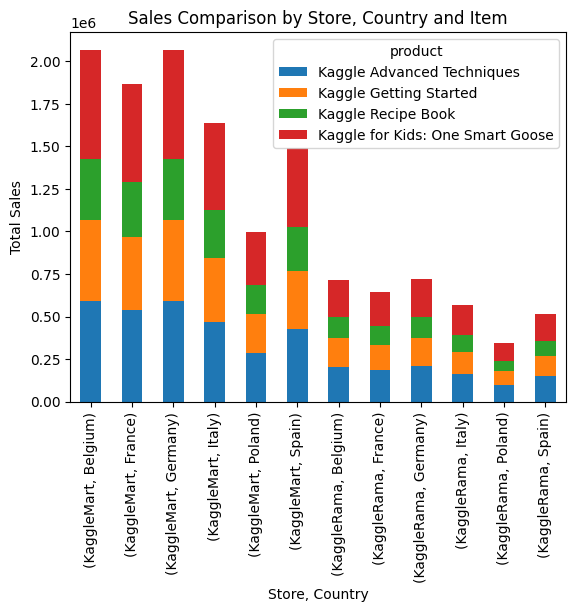

In [115]:
# Create a stacked bar chart to compare the sales of the four items between the two stores and the six countries
plt.figure(figsize=(100, 100))
train_data.groupby(['store', 'country', 'product'])['num_sold'].sum().unstack().plot(kind='bar', stacked=True)

# Add a title and axis labels
plt.title('Sales Comparison by Store, Country and Item')
plt.xlabel('Store, Country')
plt.ylabel('Total Sales')

# Display the chart
plt.show()


In [116]:
num_sold_store = train_data.groupby('store')['num_sold'].sum()
num_sold_store

store
KaggleMart    10117254
KaggleRama     3508405
Name: num_sold, dtype: int64

Text(0.5, 1.0, 'The The number of items sold in each store')

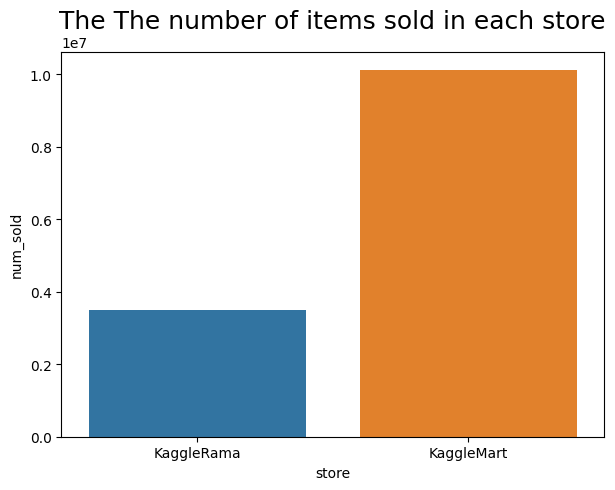

In [117]:
plt.figure(figsize=(7, 5))
ax = sns.barplot(x = num_sold_store.sort_values().index, y = num_sold_store.sort_values())
ax.set_title('The The number of items sold in each store', fontdict={'fontsize':18})

KaggleMart sold high number of items than KaggleRama

In [118]:
num_sold_country = train_data.groupby('country')['num_sold'].sum()
num_sold_country

country
Belgium    2781050
France     2512319
Germany    2786415
Italy      2201092
Poland     1341545
Spain      2003238
Name: num_sold, dtype: int64

Text(0.5, 1.0, 'The The number of items sold in each country')

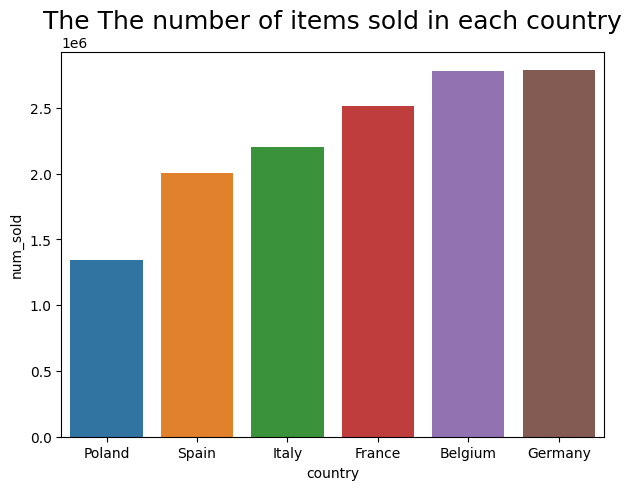

In [119]:
plt.figure(figsize=(7, 5))
ax = sns.barplot(x = num_sold_country.sort_values().index, y = num_sold_country.sort_values())
ax.set_title('The The number of items sold in each country', fontdict={'fontsize':18})

Belgium and Germany sold high number of products

In [120]:
num_sold_prod = train_data.groupby('product')['num_sold'].sum()
num_sold_prod

product
Kaggle Advanced Techniques          3913910
Kaggle Getting Started              3136903
Kaggle Recipe Book                  2349817
Kaggle for Kids: One Smart Goose    4225029
Name: num_sold, dtype: int64

Text(0.5, 1.0, 'The The number of items sold of each type')

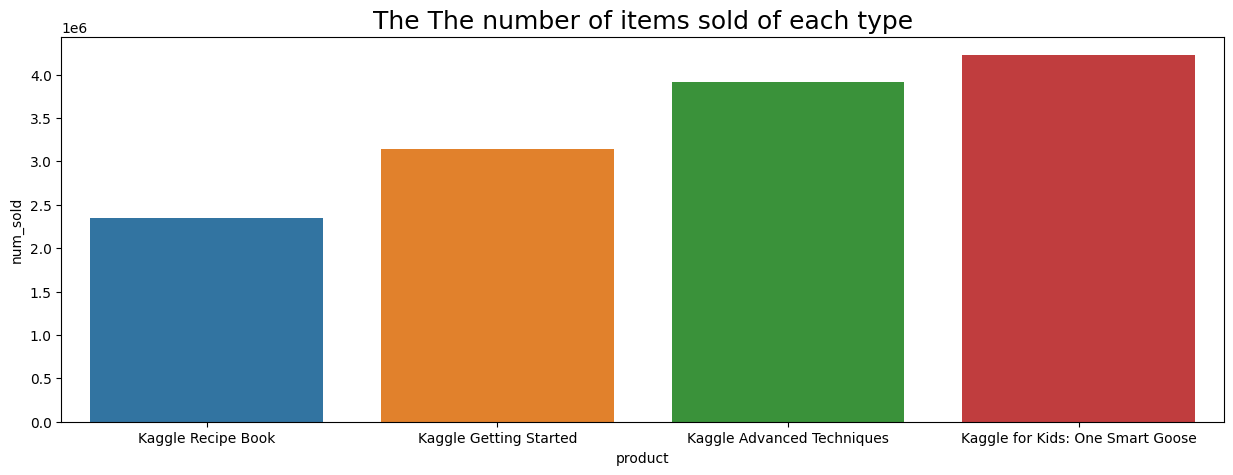

In [121]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x = num_sold_prod.sort_values().index, y = num_sold_prod.sort_values())
ax.set_title('The The number of items sold of each type', fontdict={'fontsize':18})

Kaggle for kids : One Smart Goose is most sold product

<Axes: xlabel='country', ylabel='num_sold'>

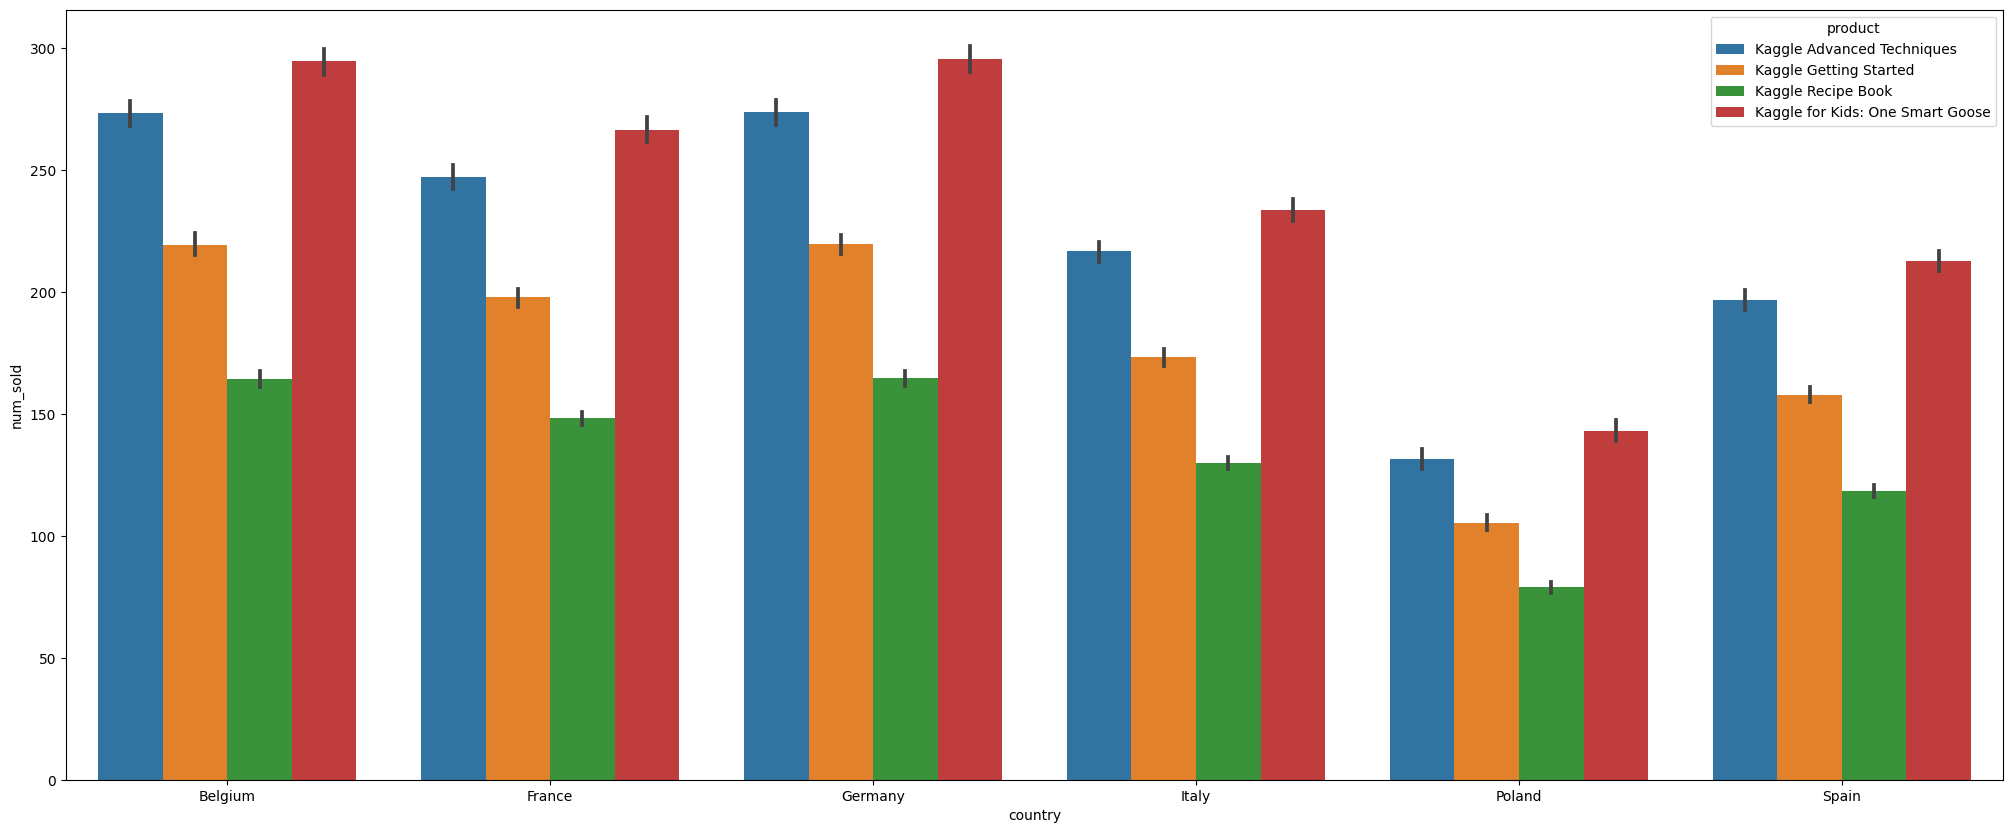

In [122]:
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(data=train_data, y='num_sold', x='country', hue='product')

<Axes: xlabel='country', ylabel='num_sold'>

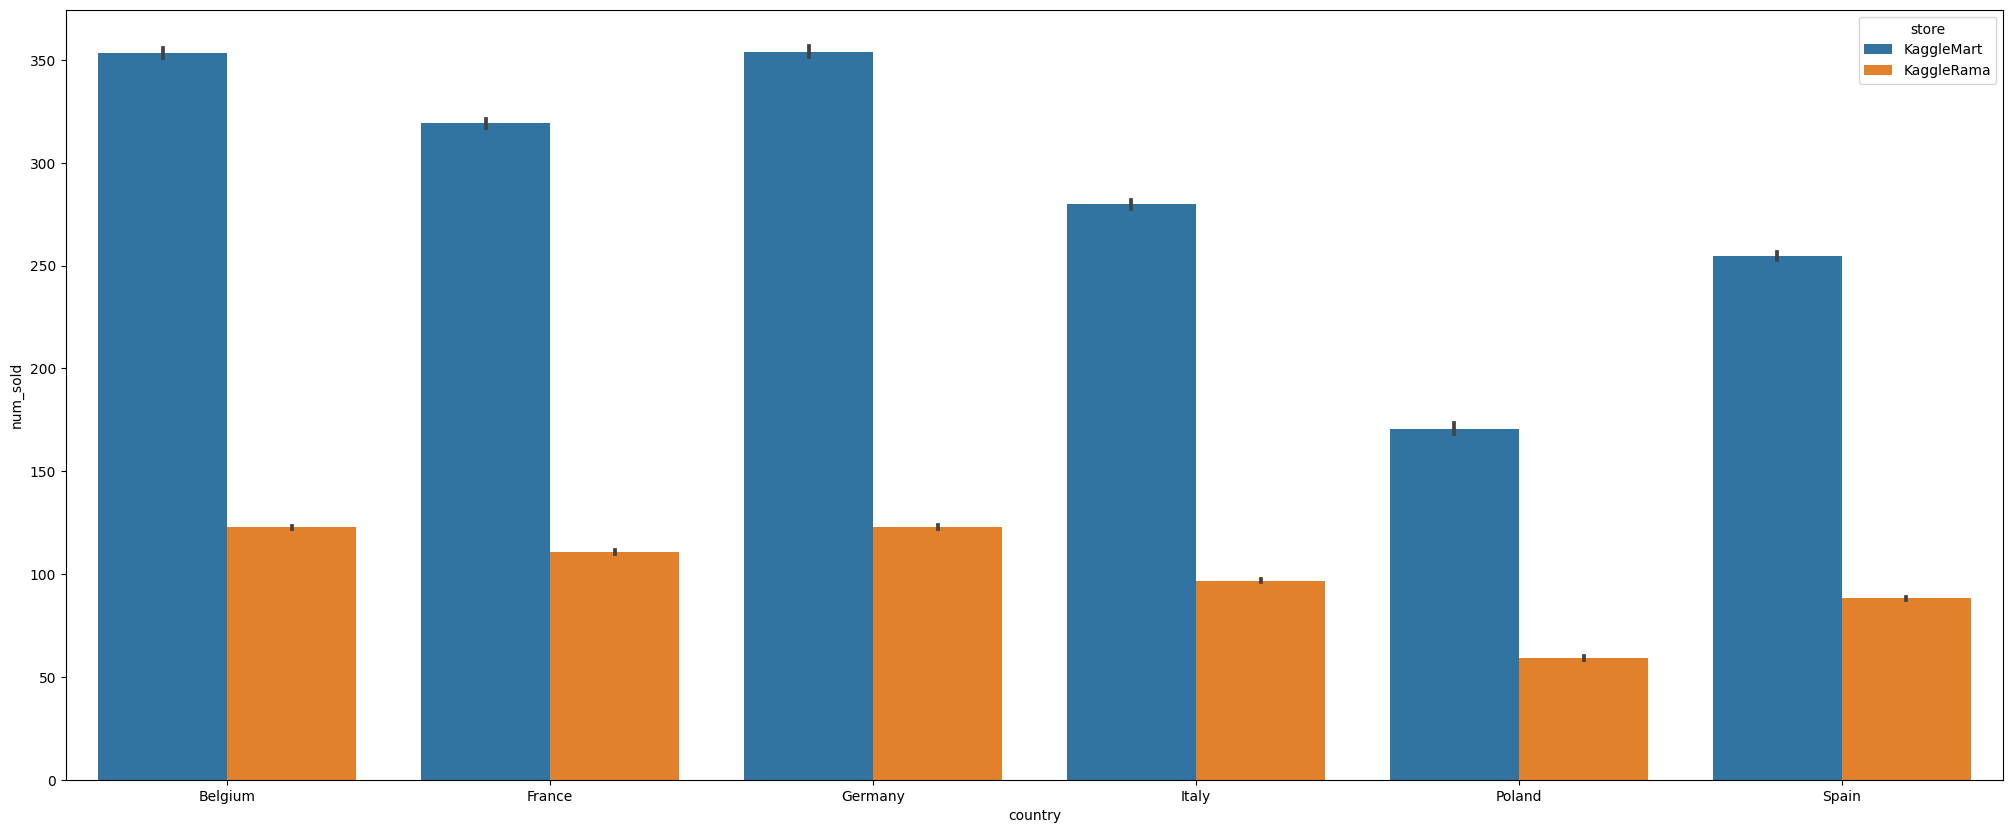

In [123]:
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(data=train_data, y='num_sold', x='country', hue='store')

<Axes: xlabel='store', ylabel='num_sold'>

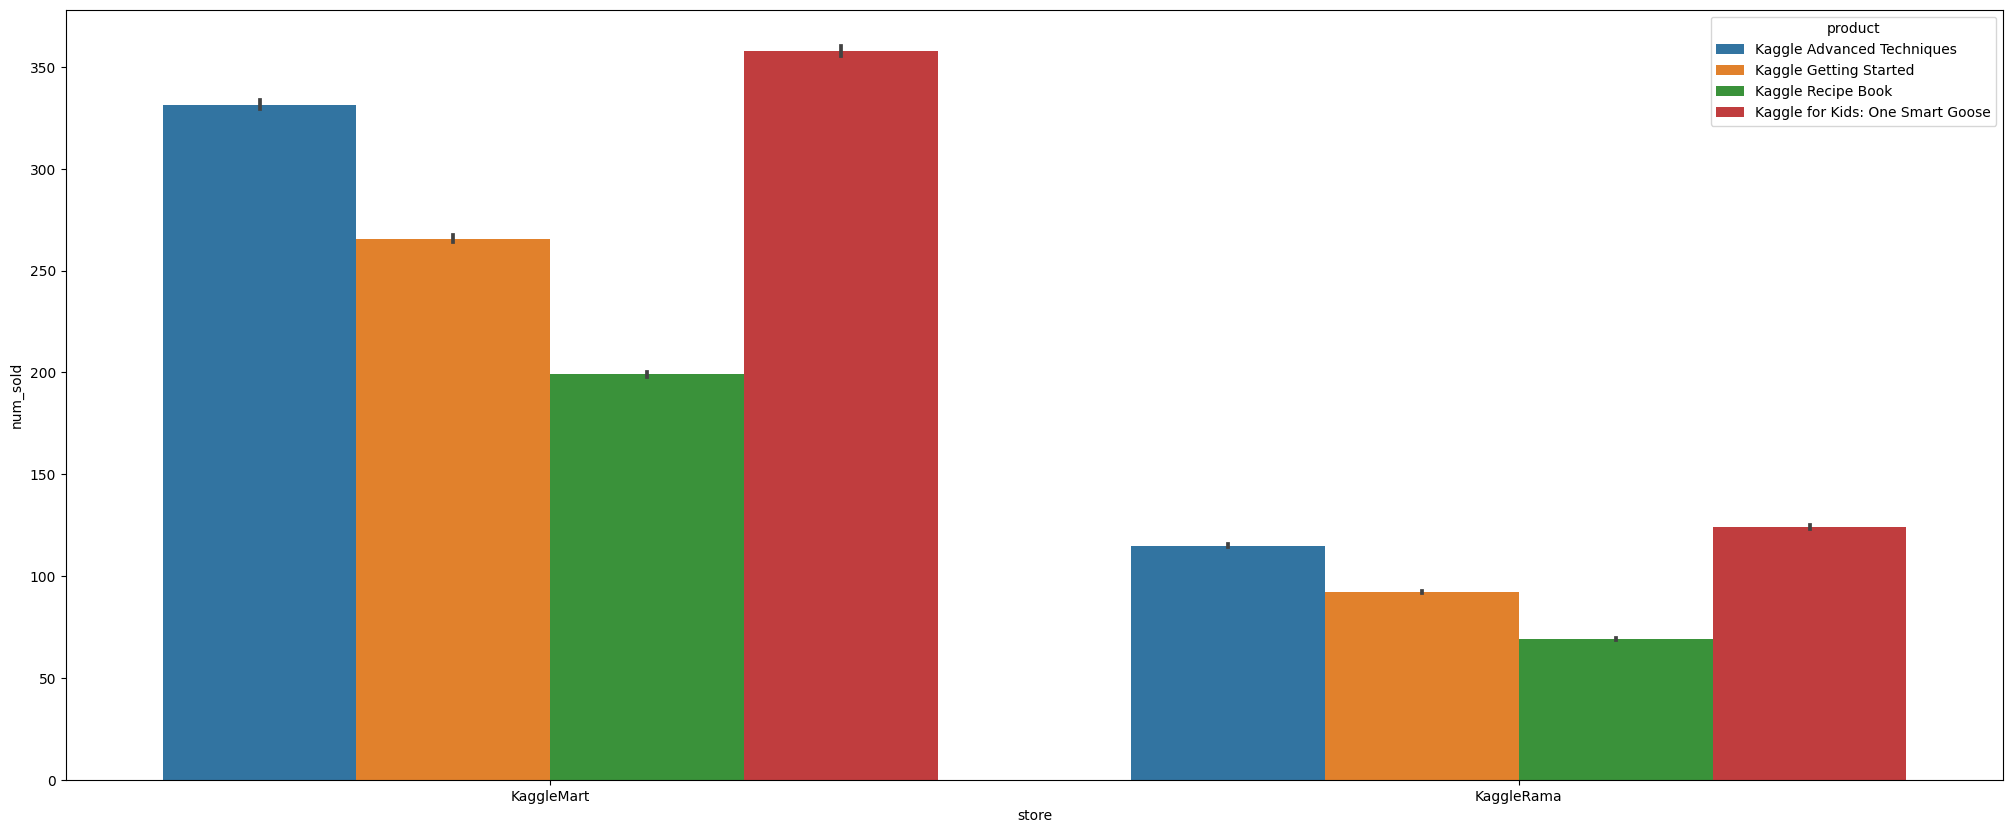

In [124]:
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(data=train_data, y='num_sold', x='store', hue='product')

In [125]:
num_sold_year = train_data.groupby('year')['num_sold'].sum()
num_sold_year

year
2017    3112163
2018    3425424
2019    3232879
2020    3855193
Name: num_sold, dtype: int64

Text(0.5, 1.0, 'The The number of items sold in each year')

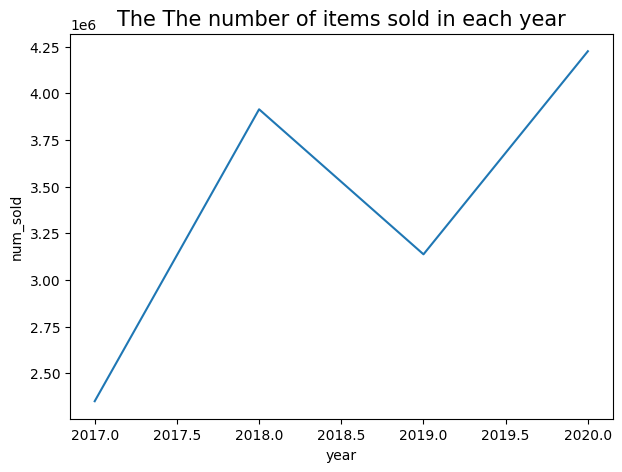

In [126]:
plt.figure(figsize=(7, 5))
ax = sns.lineplot(x = num_sold_year.sort_values().index, y = num_sold_prod.sort_values())
ax.set_title('The The number of items sold in each year', fontdict={'fontsize':15})

Total number of items sold in year 2020 is high

In [127]:
num_sold_month = train_data.groupby('month')['num_sold'].sum()
num_sold_month

month
1     1244928
2     1086253
3     1147079
4     1076549
5     1142837
6     1088330
7     1109652
8     1115626
9     1064882
10    1119781
11    1130230
12    1299512
Name: num_sold, dtype: int64

<Axes: xlabel='month', ylabel='num_sold'>

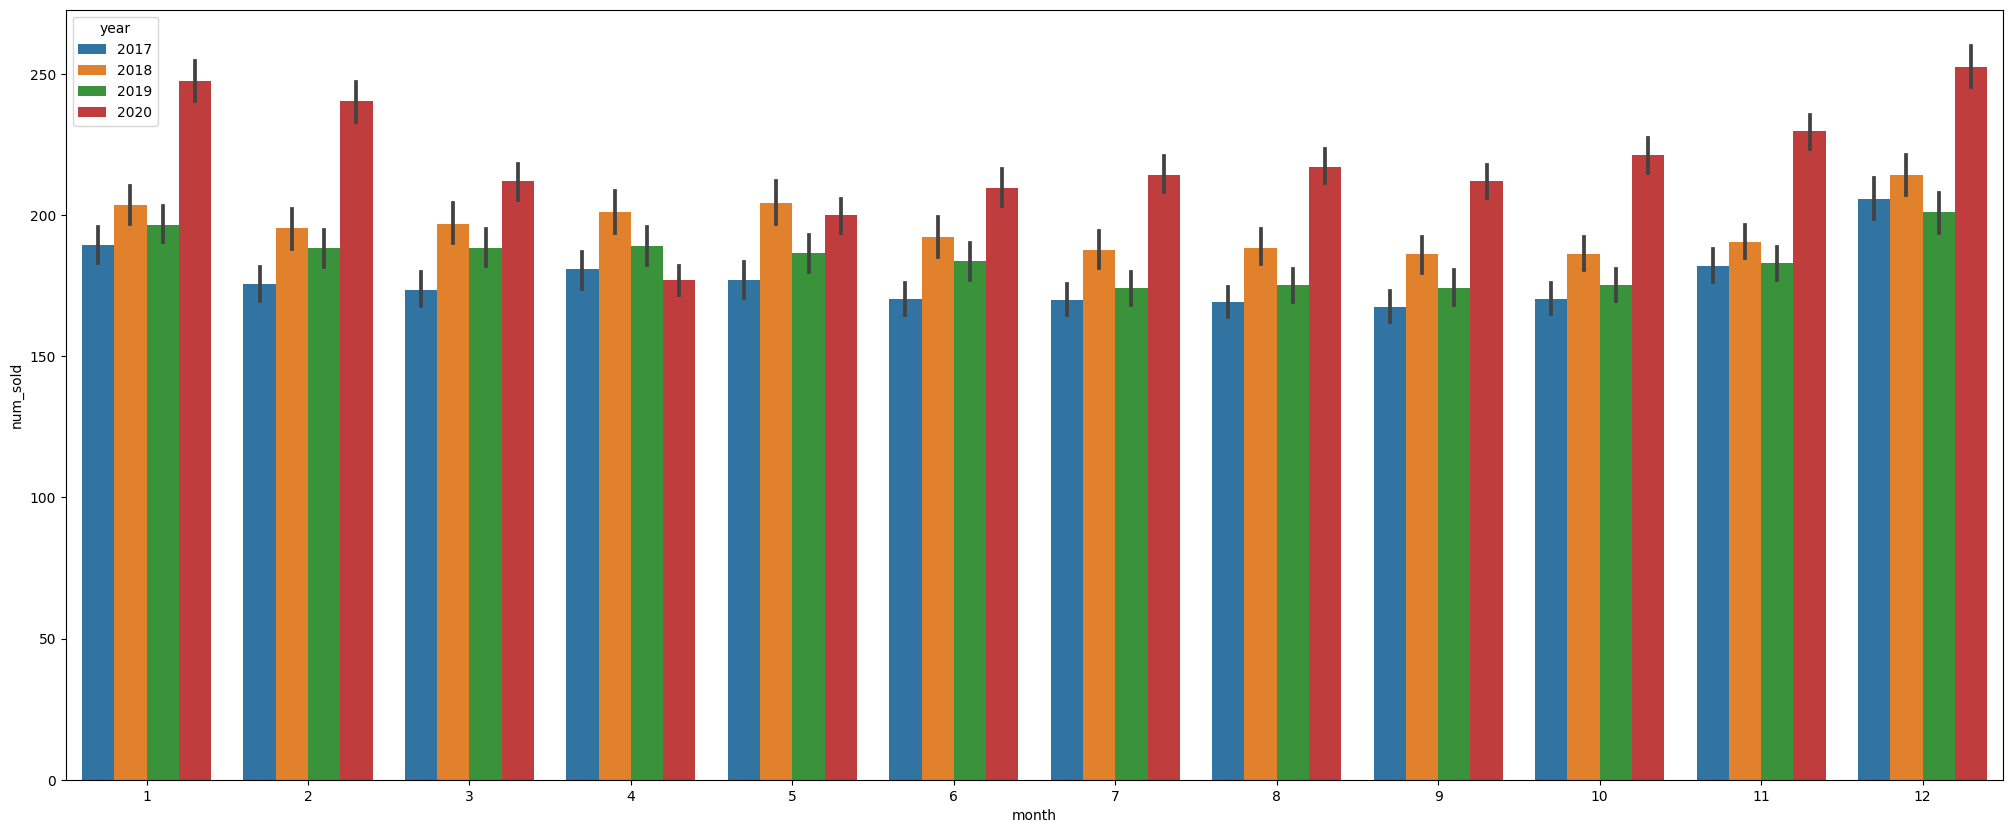

In [128]:
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(data=train_data, y='num_sold', x='month', hue='year')

In January and december sales are high in every year

In [129]:
num_sold_date = train_data.groupby('date')['num_sold'].sum()
num_sold_date

date
2017-01-01    15352
2017-01-02    11578
2017-01-03    10884
2017-01-04    10445
2017-01-05     9795
              ...  
2020-12-27    17042
2020-12-28    16789
2020-12-29    18876
2020-12-30    18938
2020-12-31    17031
Name: num_sold, Length: 1461, dtype: int64

<Axes: xlabel='day', ylabel='num_sold'>

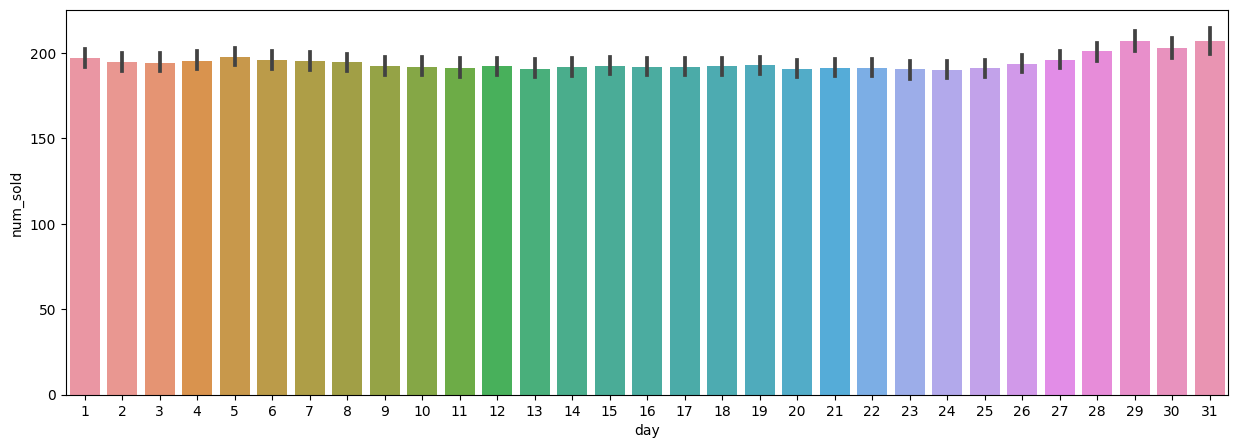

In [130]:
plt.figure(figsize=(15, 5))
sns.barplot(data=train_data, x='day', y='num_sold')

Sales on 28,29,30,31 are high

Text(0.5, 1.0, 'The The number of items sold in each year')

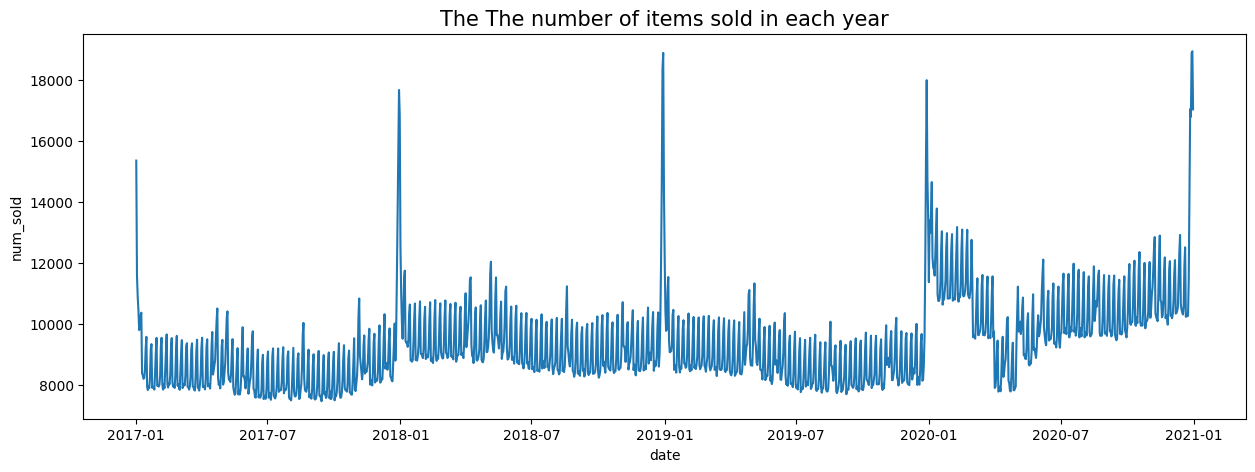

In [131]:
plt.figure(figsize=(15, 5))
ax = sns.lineplot(x = num_sold_date.sort_values().index, y = num_sold_date.sort_values())
ax.set_title('The The number of items sold in each year', fontdict={'fontsize':15})

**Correlation map**

In [132]:
# encoder = LabelEncoder()
# def encode_data(data, categories=['country', 'store', 'product']):
#     for cat in categories:
#         data[cat] = encoder.fit_transform(data[[cat]])
#     return data
# train_data = encode_data(train_data)
# test_data = encode_data(test_data)

In [133]:
# Encoding the data using Label Encoder
encoder_dict = {}
for cat in ['country', 'store', 'product']:
    encoder = LabelEncoder()
    train_data[cat] = encoder.fit_transform(train_data[cat])
    test_data[cat] = encoder.fit_transform(test_data[cat])
    encoder_dict[cat] = encoder


In [134]:
train_data.head(10)

,date,country,store,product,num_sold,year,month,day
0,2017-01-01,0,0,0,663,2017,1,1
1,2017-01-01,0,0,1,615,2017,1,1
2,2017-01-01,0,0,2,480,2017,1,1
3,2017-01-01,0,0,3,710,2017,1,1
4,2017-01-01,0,1,0,240,2017,1,1
5,2017-01-01,0,1,1,187,2017,1,1
6,2017-01-01,0,1,2,158,2017,1,1
7,2017-01-01,0,1,3,267,2017,1,1
8,2017-01-01,1,0,0,610,2017,1,1
9,2017-01-01,1,0,1,463,2017,1,1


In [135]:
encoded_data = train_data.copy()

# Inverse transform the encoded data
for cat in ['country', 'store', 'product']:
    encoder = encoder_dict[cat]
    encoded_data[cat] = encoder.inverse_transform(encoded_data[cat])
encoded_data.head(10)

,date,country,store,product,num_sold,year,month,day
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017,1,1
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,2017,1,1
2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,2017,1,1
3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017,1,1
4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017,1,1
5,2017-01-01,Belgium,KaggleRama,Kaggle Getting Started,187,2017,1,1
6,2017-01-01,Belgium,KaggleRama,Kaggle Recipe Book,158,2017,1,1
7,2017-01-01,Belgium,KaggleRama,Kaggle for Kids: One Smart Goose,267,2017,1,1
8,2017-01-01,France,KaggleMart,Kaggle Advanced Techniques,610,2017,1,1
9,2017-01-01,France,KaggleMart,Kaggle Getting Started,463,2017,1,1


C:\Users\ssri2\AppData\Local\Temp\ipykernel_8860\233630430.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_data.corr()


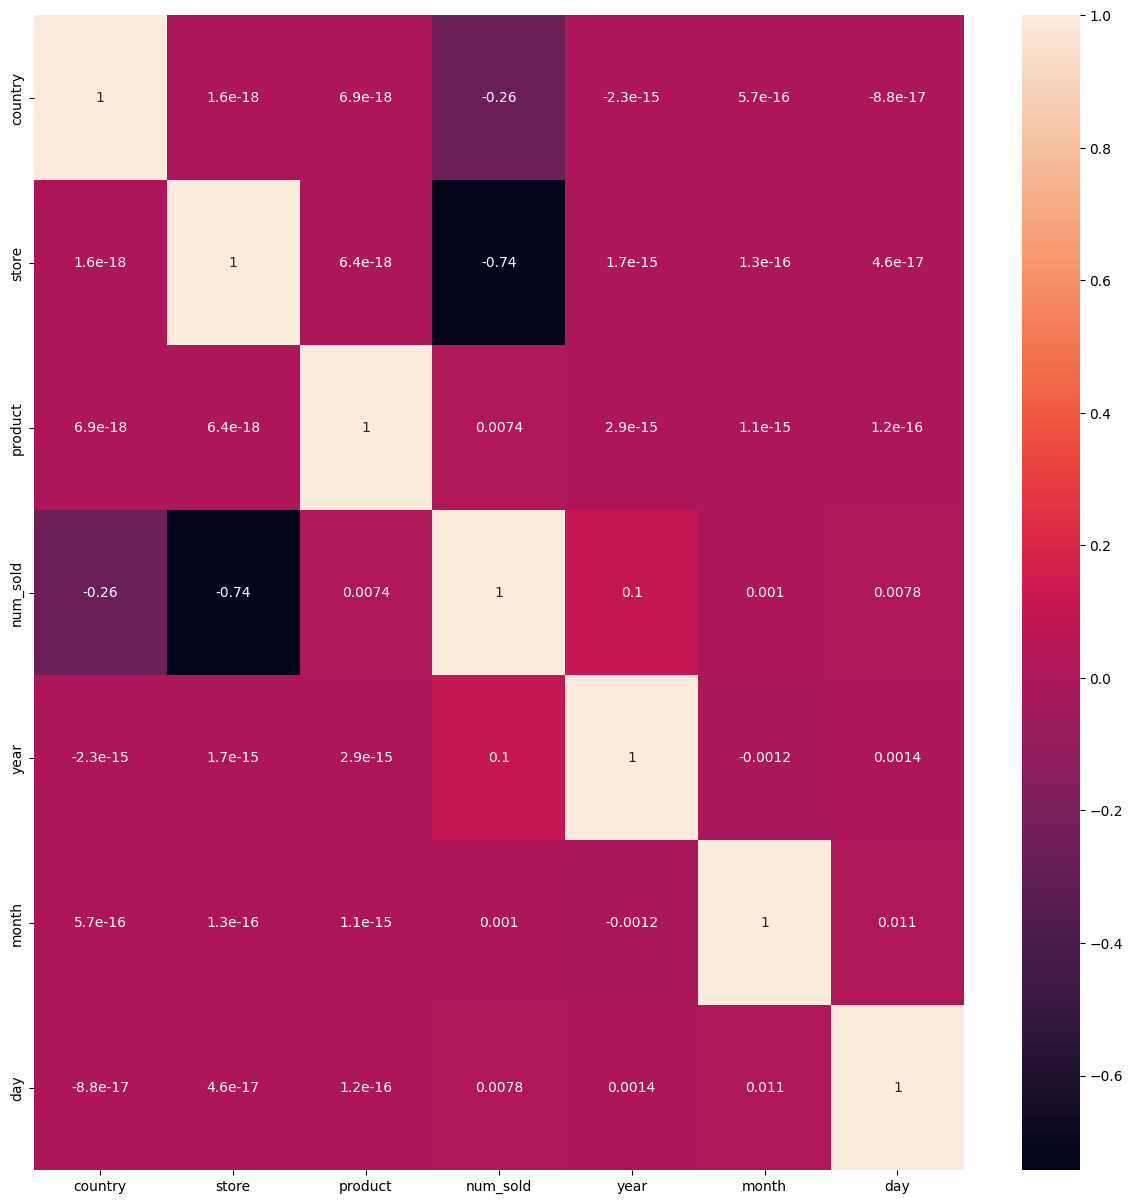

In [136]:
plt.figure(figsize = (15,15))
corr_matrix = train_data.corr()

# Create heatmap
sns.heatmap(corr_matrix,annot = True)

# Show plot
plt.show()

Correlation map shows that 'num_sold' column is highly correlated with 'country','store','year'.

We can drop 'row_id' column as it is weakly correlated with 'num_sold' column.
 
Though 'product' column is weakly correlated with 'num_sold' we can directly drop that column. Instead we can first visualize how it varies with target column.

**Preprocessing**

In [137]:
train_data.drop(['date'],axis = 1,inplace = True)

In [138]:
test_data.drop(['date'],axis = 1,inplace = True)

In [139]:
train_data.drop(['day'],axis = 1,inplace = True)
test_data.drop(['day'],axis = 1,inplace = True)

In [140]:
train_data.head()

,country,store,product,num_sold,year,month
0,0,0,0,663,2017,1
1,0,0,1,615,2017,1
2,0,0,2,480,2017,1
3,0,0,3,710,2017,1
4,0,1,0,240,2017,1


In [141]:

test_data.head()

,country,store,product,year,month
0,0,0,0,2021,1
1,0,0,1,2021,1
2,0,0,2,2021,1
3,0,0,3,2021,1
4,0,1,0,2021,1


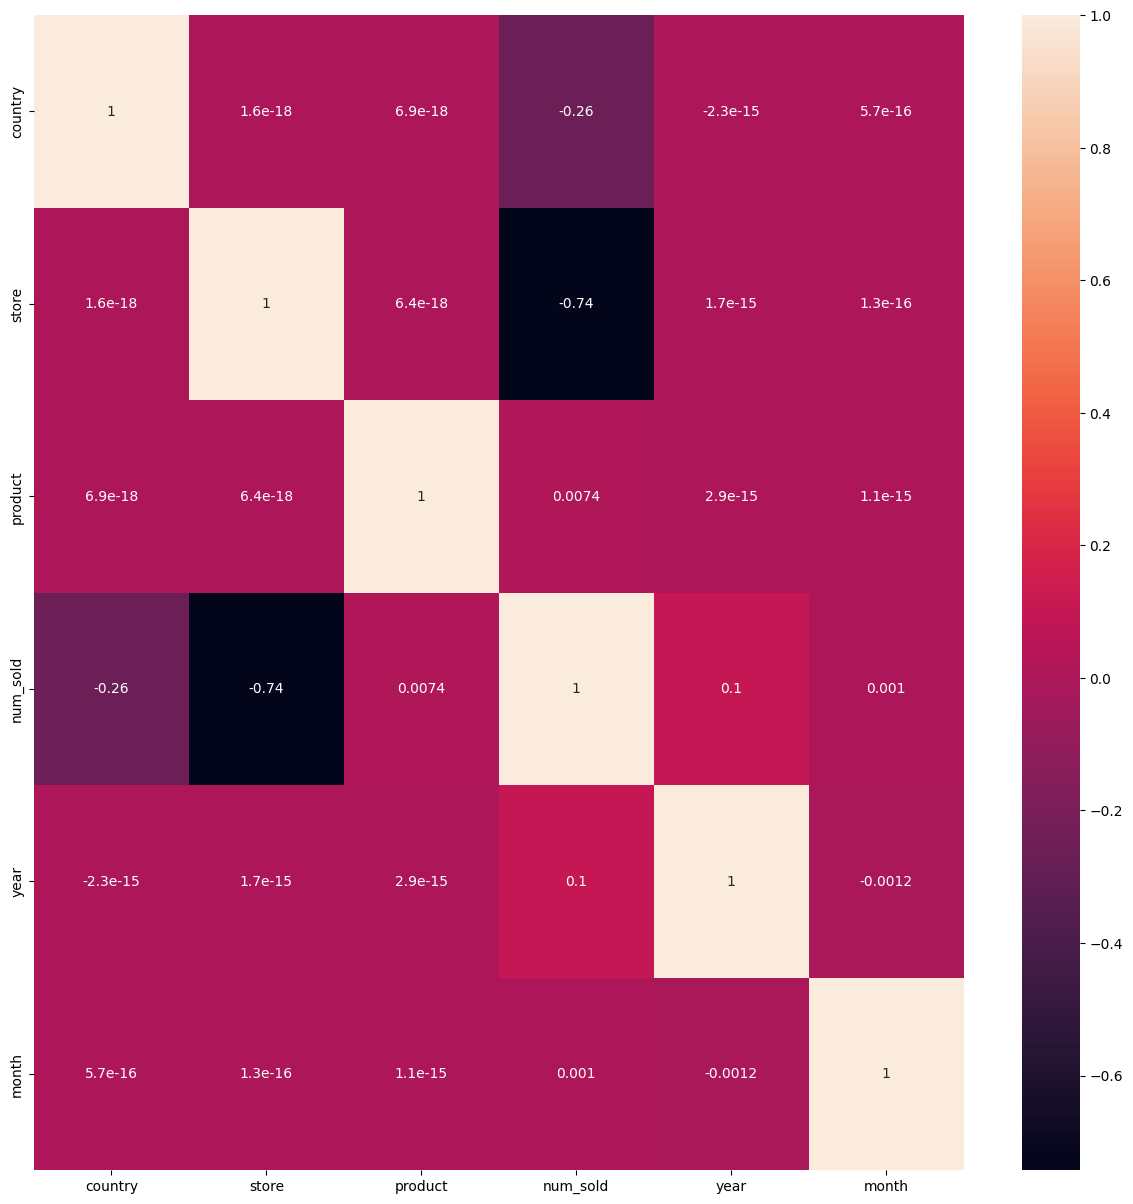

In [142]:
plt.figure(figsize = (15,15))
corr_matrix = train_data.corr()

# Create heatmap
sns.heatmap(corr_matrix,annot = True)

# Show plot
plt.show()

**Train Test Split**

In [143]:
from sklearn.model_selection import train_test_split

y = train_data['num_sold'] #target column
X = train_data.drop(['num_sold'], axis =1)  #training columns

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state = 42)


print("X-train shape :", X_train.shape)
print("y-train shape :", y_train.shape)
print("X-val shape :", X_val.shape)
print("y-val shape :", y_val.shape)

X-train shape : (56102, 5)
y-train shape : (56102,)
X-val shape : (14026, 5)
y-val shape : (14026,)


**Modelling**

In [144]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [145]:
def smape(y_true, y_pred):
    return (100/len(y_true)) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))


**Linear Regression**

In [146]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

LR_model.fit(X_train, y_train)

# Predict target variable using fitted model on testing data
y_pred = LR_model.predict(X_val)

# Calculate evaluation metrics on testing data
rmse = np.sqrt(mean_squared_error(y_val, y_pred)) 
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
smape_score = smape(y_val, y_pred)

print("SMAPE score: {:.2f}%".format(smape_score))
print('RMSE Score : ',rmse)
print("Mean Absolute Percentage Error:", mape)
print('Mean Absolute Error : ',mae)
print('r2 - Score :',r2)

SMAPE score: 32.24%
RMSE Score :  76.76921795839816
Mean Absolute Percentage Error: 37.93543839647205
Mean Absolute Error :  57.10750204039139
r2 - Score : 0.6264958346796721


In [147]:
Metrics = pd.DataFrame({
    'SMAPE' : smape_score,
    'MAPE' : mape,
    'MAE' : mae,
    'rmse' : rmse,
    'R2 - score ' : r2},index = ['Linear Regression'])

In [148]:
Metrics

,SMAPE,MAPE,MAE,rmse,R2 - score
Linear Regression,32.241089,37.935438,57.107502,76.769218,0.626496


**Decision Tree Regressor**

In [149]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Predict target variable using fitted model on testing data
y_pred = regressor.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred)) 
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
smape_score = smape(y_val, y_pred)

print("SMAPE score: {:.2f}%".format(smape_score))
print('RMSE Score : ',rmse)
print("Mean Absolute Percentage Error:", mape)
print('Mean Absolute Error : ',mae)
print('r2 - Score :',r2)

SMAPE score: 8.91%
RMSE Score :  28.915451904340802
Mean Absolute Percentage Error: 8.909509946772861
Mean Absolute Error :  17.74743584685675
r2 - Score : 0.947011553824499


In [150]:
DT_Metrics = pd.DataFrame({
    'SMAPE' : smape_score,
    'MAPE' : mape,
    'MAE' : mae,
    'rmse' : rmse,
    'R2 - score ' : r2},index = ['Decision Tree Regressor'])

In [151]:
Metrics = pd.concat([Metrics,DT_Metrics])

In [152]:
Metrics

,SMAPE,MAPE,MAE,rmse,R2 - score
Linear Regression,32.241089,37.935438,57.107502,76.769218,0.626496
Decision Tree Regressor,8.913633,8.909510,17.747436,28.915452,0.947012


**Random Forest Regressor**

In [153]:
rf = RandomForestRegressor(n_estimators= 100,max_depth= 10,min_samples_split=5,min_samples_leaf= 2,max_features= 'sqrt')

In [154]:
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [5, 10, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt']
# }

In [155]:
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)


In [156]:
# grid_search.fit(X_train, y_train)


In [157]:
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_


In [158]:
# rf = RandomForestRegressor(**best_params)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)


In [159]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred)) 
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
smape_score = smape(y_val, y_pred)

print("SMAPE score: {:.2f}%".format(smape_score))
print('RMSE Score : ',rmse)
print("Mean Absolute Percentage Error:", mape)
print('Mean Absolute Error : ',mae)
print('r2 - Score :',r2)

SMAPE score: 9.93%
RMSE Score :  30.579297801435846
Mean Absolute Percentage Error: 10.077263709015991
Mean Absolute Error :  19.083925239319438
r2 - Score : 0.9407380096797159


In [160]:
RF_Metrics = pd.DataFrame({
    'SMAPE' : smape_score,
    'MAPE' : mape,
    'MAE' : mae,
    'rmse' : rmse,
    'R2 - score ' : r2},index = ['Random Forest Regressor'])
Metrics = pd.concat([Metrics,RF_Metrics])

In [161]:
Metrics

,SMAPE,MAPE,MAE,rmse,R2 - score
Linear Regression,32.241089,37.935438,57.107502,76.769218,0.626496
Decision Tree Regressor,8.913633,8.909510,17.747436,28.915452,0.947012
Random Forest Regressor,9.931170,10.077264,19.083925,30.579298,0.940738


**XGBoost Regressor**

In [162]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=900, seed=42,missing = 1)

xg_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xg_reg.predict(X_val)

In [163]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred)) 
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
smape_score = smape(y_val, y_pred)

print("SMAPE score: {:.2f}%".format(smape_score))
print('RMSE Score : ',rmse)
print("Mean Absolute Percentage Error:", mape)
print('Mean Absolute Error : ',mae)
print('r2 - Score :',r2)

SMAPE score: 8.88%
RMSE Score :  28.83960898898401
Mean Absolute Percentage Error: 8.877592003143803
Mean Absolute Error :  17.68779175920322
r2 - Score : 0.947289158183472


In [164]:
XG_Metrics = pd.DataFrame({
    'SMAPE' : smape_score,
    'MAPE' : mape,
    'MAE' : mae,
    'rmse' : rmse,
    'R2 - score ' : r2},index = ['XGBoost Regressor'])
Metrics = pd.concat([Metrics,XG_Metrics])

In [165]:
Metrics

,SMAPE,MAPE,MAE,rmse,R2 - score
Linear Regression,32.241089,37.935438,57.107502,76.769218,0.626496
Decision Tree Regressor,8.913633,8.909510,17.747436,28.915452,0.947012
Random Forest Regressor,9.931170,10.077264,19.083925,30.579298,0.940738
XGBoost Regressor,8.881204,8.877592,17.687792,28.839609,0.947289


**Submission**

In [166]:
Submission = pd.read_csv('sample_submission.csv')

In [167]:
test_data.columns

Index(['country', 'store', 'product', 'year', 'month'], dtype='object')

In [168]:
train_data.columns

Index(['country', 'store', 'product', 'num_sold', 'year', 'month'], dtype='object')

In [169]:
Final_Prediction = xg_reg.predict(test_data)

In [170]:
Submission.num_sold = Final_Prediction
Submission.head(10)

,row_id,num_sold
0,70128,431.902679
1,70129,311.020203
2,70130,277.566956
3,70131,437.192566
4,70132,145.973770
5,70133,108.899742
6,70134,94.066399
7,70135,156.205612
8,70136,434.467712
9,70137,313.859833


In [171]:
Submission.shape

(17520, 2)

In [172]:
Submission.to_csv("submission.csv", index=False)

In [173]:
!pip install gradio


     ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.7 MB 1.4 MB/s eta 0:00:12
     --------------------------------------- 0.1/15.7 MB 660.6 kB/s eta 0:00:24
     --------------------------------------- 0.1/15.7 MB 819.2 kB/s eta 0:00:20
     --------------------------------------- 0.1/15.7 MB 819.2 kB/s eta 0:00:20
     --------------------------------------- 0.1/15.7 MB 819.2 kB/s eta 0:00:20
     --------------------------------------- 0.1/15.7 MB 819.2 kB/s eta 0:00:20
     --------------------------------------- 0.1/15.7 MB 819.2 kB/s eta 0:00:20
     --------------------------------------- 0.1/15.7 MB 819.2 kB/s eta 0:00:20
     --------------------------------------- 0.1/15.7 MB 819.2 kB/s eta 0:00:20
     --------------------------------------- 0.2/15.7 MB 380.8 kB/s eta 0:00:41
      -------------------------------------- 0.2/15.7 MB 

  DEPRECATION: ffmpy is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559


In [174]:
import gradio as gr
import warnings
warnings.filterwarnings('ignore')

C:\Users\ssri2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [175]:
#country = {0:Belgium,1:France,2:Germany,3:Italy,4:Poland,5:Spain}
#store{0 : KaggleMart,1:KaggleRama}
#product = {0:Kaggle Advanced Techniques,1:Kaggle Getting Started,2:Kaggle Recipe Book	,3:Kaggle for Kids: One Smart Goose}

In [176]:
def sales_prediction(country, store, product, year, month):
    x = np.asarray([country, store, product, year, month])
    prediction = xg_reg.predict(x.reshape(1,-1))
    return prediction

In [177]:
sales_prediction(1,1,1,2021,1)

array([109.82114], dtype=float32)

In [178]:
outputs = gr.outputs.Textbox()
app = gr.Interface(fn=sales_prediction, inputs=['number', 'number', 'number', 'number', 'number'], outputs=outputs, description="Predict sales based on country, store, product, year, and month " )

In [179]:
app.launch(share = True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://da5c55f73bf0ab2b8c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


**Saving the trained model**

In [180]:
import pickle
pickle.dump(xg_reg , open('model_pickel.pkl' , 'wb'))